In [1]:
import math
import warnings
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
terror = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [3]:
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [5]:
terror.shape

(181691, 135)

In [6]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [7]:
terror=terror[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [8]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [9]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [10]:
terror.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [11]:
print("Country with the most attacks:",terror['Country'].value_counts().idxmax())
print("City with the most attacks:",terror['city'].value_counts().index[1]) 
print("Region with the most attacks:",terror['Region'].value_counts().idxmax())
print("Year with the most attacks:",terror['Year'].value_counts().idxmax())
print("Month with the most attacks:",terror['Month'].value_counts().idxmax())
print("Group with the most attacks:",terror['Group'].value_counts().index[1])
print("Most Attack Types:",terror['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


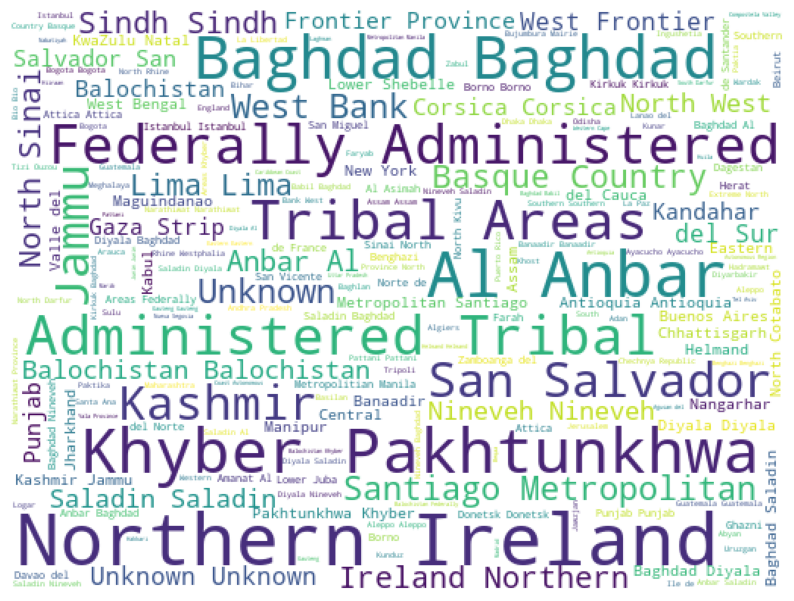

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# DataFrame called "terror" with a "state" column
cities = terror['state'].dropna()

plt.subplots(figsize=(10, 10))
wordcloud = WordCloud(
    background_color='white',
    width=512,
    height=384
).generate(' '.join(cities))

plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [13]:
terror['Year'].value_counts(dropna = False).sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

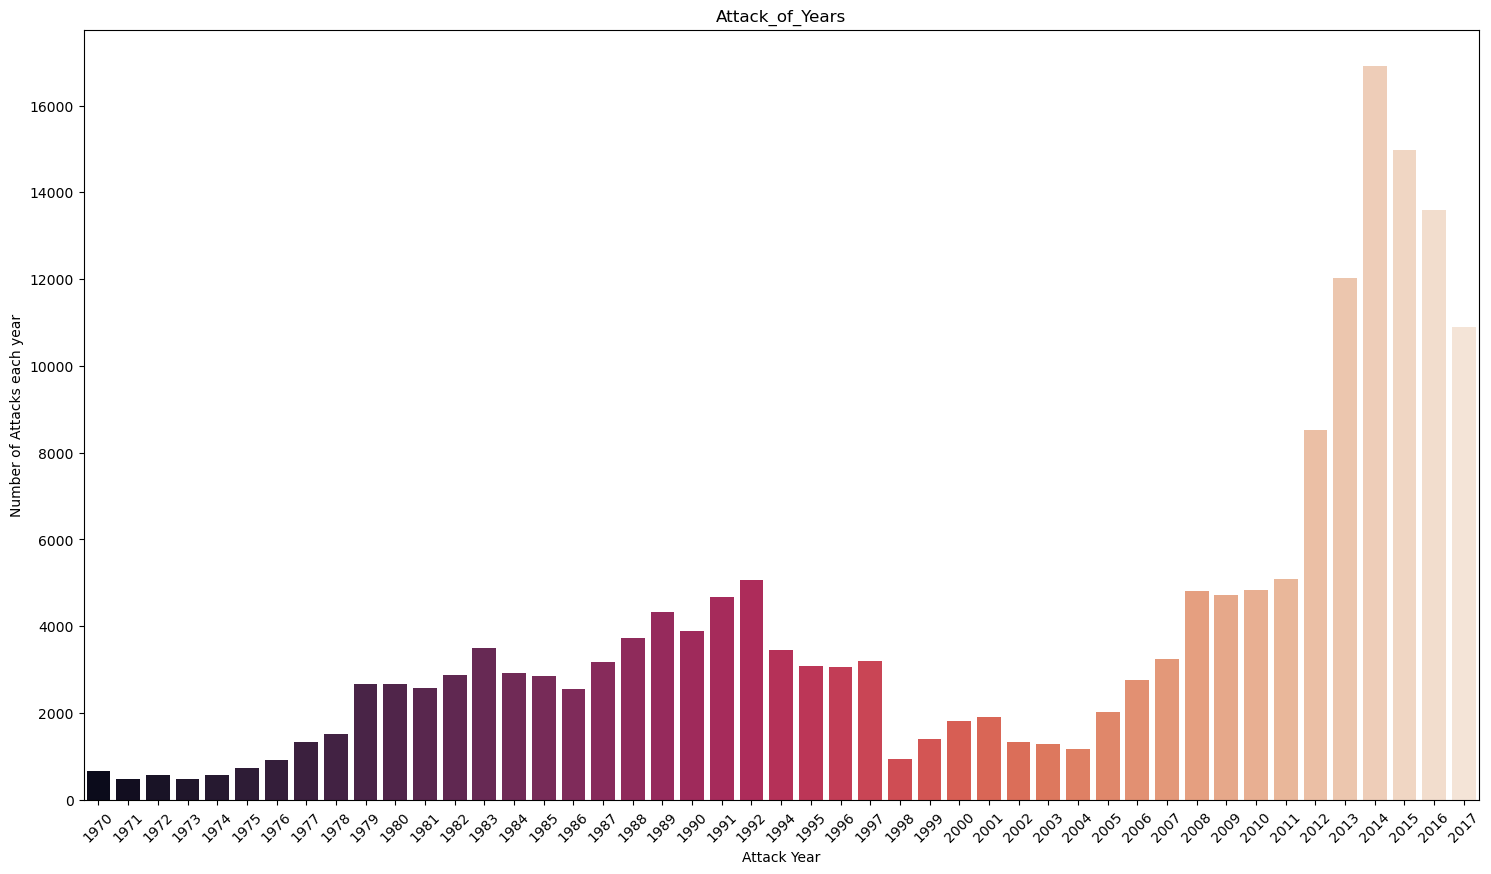

In [14]:
x_year = terror['Year'].unique()
y_count_years = terror['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (18,10))
sns.barplot(x = x_year,
           y = y_count_years,
           palette = 'rocket')
plt.xticks(rotation = 45)
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.title('Attack_of_Years')
plt.show()

#Terrorism at its peak in 2014

In [15]:

#import plotly.express as px


#fig = px.density_mapbox(terror, lat = 'latitude', lon = 'longitude',
#radius = 8,zoom=1,mapbox_style = 'open-street-map',opacity=0.5)
#fig.show() 


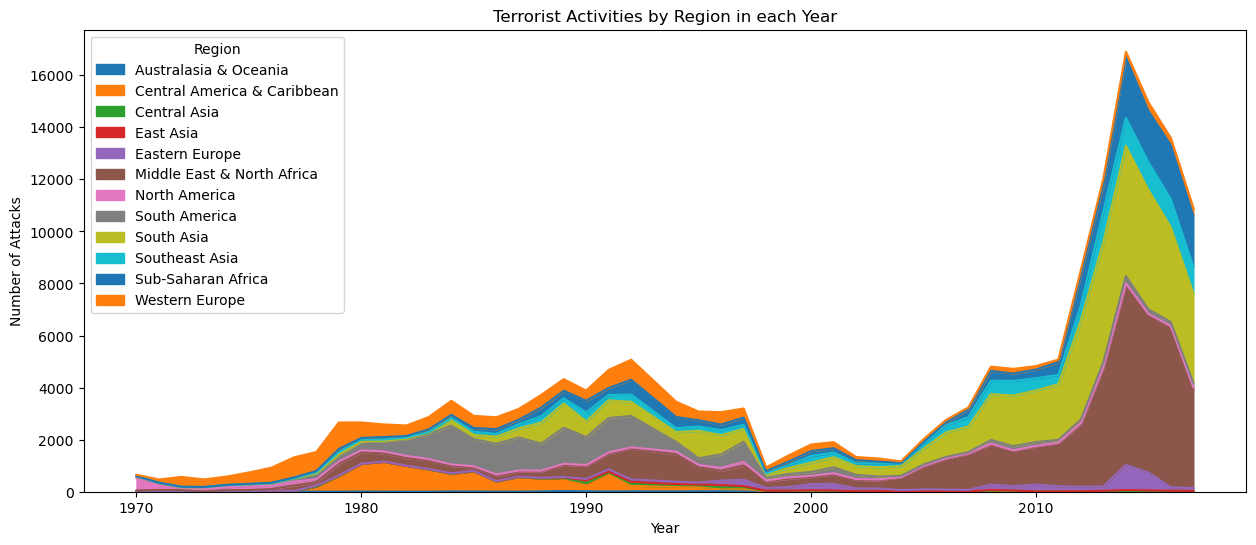

In [16]:
pd.crosstab(terror.Year, terror.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

In [17]:
terror['Wounded'] = terror['Wounded'].fillna(0).astype(int)
terror['Killed'] = terror['Killed'].fillna(0).astype(int)
terror['casualities'] = terror['Killed'] + terror['Wounded']

In [18]:
terror1 = terror.sort_values(by='casualities',ascending=False)[:40]

In [19]:
terror1.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
73126,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1384,8190,Passengers and crew members on American Airlin...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
73127,2001,9,11,United States,New York,North America,New York City,40.697132,-73.931351,Hijacking,1383,8191,Passengers and crew members on United Airlines...,09/11/2001: This was one of four related attac...,Al-Qaida,Private Citizens & Property,Vehicle (not to include vehicle-borne explosiv...,Unknown,9574
58841,1995,3,20,Japan,Tokyo,East Asia,Tokyo,35.689125,139.747742,Unarmed Assault,13,5500,Subway system,NaN,Aum Shinri Kyo,Transportation,Chemical,NaN,5513
68071,1998,8,7,Kenya,Nairobi,Sub-Saharan Africa,Nairobi,-1.285180,36.821107,Bombing/Explosion,224,4000,"United States Embassy in Nairobi, Kenya",08/07/1998: Suicide attackers detonated a vehi...,Al-Qaida,Government (Diplomatic),Explosives,Unknown,4224
133518,2014,6,12,Iraq,Saladin,Middle East & North Africa,Tikrit,34.621521,43.668377,Hostage Taking (Kidnapping),1570,0,Soldiers,06/12/2014: Assailants abducted approximately ...,Islamic State of Iraq and the Levant (ISIL),Military,Firearms,The Islamic State of Iraq and the Levant (ISIL...,1570


In [20]:
lat = terror1['latitude'].values
lon = terror1['longitude'].values


#Top Locations with Highest Casualities

In [21]:

from ipyleaflet import basemaps
from ipyleaflet import Map
from ipyleaflet import Marker

m = Map(center=(18,95), zoom=1, basemap = basemaps.Esri.WorldStreetMap)

for name, lon, lat in terror1[["Country", "longitude", "latitude"]].values:
    marker = Marker(location=(lat, lon), draggable=False, title=name, alt=name)
    m.add_layer(marker)

m.layout.height="550px"

m

Map(center=[18, 95], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [22]:
from ipyleaflet import Circle
from ipywidgets import HTML
m = Map(center=(18,95), zoom=2, basemap = basemaps.Esri.WorldStreetMap)

for name, casualities, lon, lat in terror1[["city", "casualities", "longitude", "latitude"]].values:
    message = HTML(value="%s : %d"%(name, casualities))
    circle = Circle(location=(lat, lon), radius=casualities//10, color="dodgerblue", fill_color="black")

    circle.popup = message

    m.add_layer(circle)

m.layout.height="550px"
m

Map(center=[18, 95], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

#Top 40 Countries affected with casualities and responsible groups

In [23]:
from ipyleaflet import Popup
from ipywidgets import HTML
m = Map(center=(18,95), zoom=3, basemap = basemaps.Esri.WorldStreetMap)

for name, casualities, lon, lat,group in terror1[["city", "casualities", "longitude", "latitude","Group"]].values:
    message = HTML(value="%s : %d:%s"%(name, casualities,group))
    circle = Popup(location=(lat, lon), child=message, close_button=True, auto_close=False, close_on_escape_key=False)

    #circle.popup = message

    m.add_layer(circle)

m.layout.height="550px"
m

Map(center=[18, 95], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

In [24]:
#Middle East region is most affected by terrorism including South Asia, Africa,America